In [1]:
import sys
print sys.executable

paths = ['', '/Users/dyawitz/anaconda/bin', '/Users/dyawitz/anaconda/lib/python27.zip', '/Users/dyawitz/anaconda/lib/python2.7/plat-darwin', '/Users/dyawitz/anaconda/lib/python2.7/plat-mac', '/Users/dyawitz/anaconda/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/dyawitz/anaconda/lib/python2.7/lib-tk', '/Users/dyawitz/anaconda/lib/python2.7/lib-old', '/Users/dyawitz/anaconda/lib/python2.7/lib-dynload', '/Users/dyawitz/anaconda/lib/python2.7/site-packages/Sphinx-1.3.1-py2.7.egg', '/Users/dyawitz/anaconda/lib/python2.7/site-packages/setuptools-18.5-py2.7.egg', '/Users/dyawitz/anaconda/lib/python2.7/site-packages', '/Users/dyawitz/anaconda/lib/python2.7/site-packages/aeosa', '/Users/dyawitz/anaconda/lib/python2.7/site-packages/IPython/extensions', '/Users/dyawitz/.ipython']

for i in paths:
   sys.path.append(i)

/Users/dyawitz/anaconda/envs/py27/bin/python


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

In [3]:
weather_dict = joblib.load('weather_dict.pkl')

In [4]:
weather_dict

{'CAPITL': ('kalb', 'Capital', 'Albany'),
 'CENTRL': ('ksyr', 'Central', 'Syracuse'),
 'DUNWOD': ('klga', 'Dunwoodie', 'Yonkers'),
 'GENESE': ('kroc', 'Genese', 'Rochester'),
 'HUD VL': ('kpou', 'Hudson Valley', 'Poughkeepsie'),
 'LONGIL': ('kjfk', 'Long Island', 'NYC'),
 'MHK VL': ('krme', 'Mohawk Valley', 'Utica'),
 'MILLWD': ('klga', 'Millwood', 'Yonkers'),
 'N.Y.C.': ('kjfk', 'NYC', 'NYC'),
 'NORTH': ('kpbg', 'North', 'Plattsburgh'),
 'WEST': ('kbuf', 'West', 'Buffalo')}

In [4]:
region = 'CAPITL'
airport = weather_dict[region][0]
place = weather_dict[region][1].lower().replace(' ','')

In [5]:
loads = pd.read_csv('../data/nyiso/all/{0}_region.csv'.format(place))

In [10]:
loads['timestamp'] = loads.timestamp.apply(lambda x: pd.to_datetime(x))

In [11]:
#datetime value of one day
phour = pd.Timedelta('1 hour')

def get_prev_hours(x, n_hours):
    '''Take a datetime (x) in the 'full' dataframe, and outputs the load value n_hours before that datetime'''
    try:
        lo = loads[loads.timestamp == x - n_hours*phour].load.values[0]
    except:
        lo = loads[loads.timestamp == x].load.values[0]
    return lo 

In [13]:
#datetime value of one day
pday = pd.Timedelta('1 day')

def get_prev_days(x, ndays):
    '''Take a datetime (x) in the 'full' dataframe, and outputs the load value n_hours before that datetime'''
    try:
        lo = loads[loads.timestamp == x - ndays*pday].load.values[0]
    except:
        lo = loads[loads.timestamp == x].load.values[0]
    return lo 

In [14]:
%time loads['dow'] = loads.timestamp.apply(lambda x: x.dayofweek)

CPU times: user 5.97 s, sys: 290 ms, total: 6.26 s
Wall time: 6.36 s


In [15]:
%time loads['doy'] = loads.timestamp.apply(lambda x: x.dayofyear)

CPU times: user 22.9 s, sys: 347 ms, total: 23.2 s
Wall time: 23.4 s


In [16]:
loads['day'] = loads.timestamp.apply(lambda x: x.day)
loads['month'] = loads.timestamp.apply(lambda x: x.month)
loads['year'] = loads.timestamp.apply(lambda x: x.year)
loads['hour'] = loads.timestamp.apply(lambda x: x.hour)
loads['minute'] = loads.timestamp.apply(lambda x: x.hour*60 + x.minute)

In [19]:
loads

,timestamp,timezone,name,ptid,load,dow,doy,day,month,year,hour,minute
0,2001-05-26 00:00:00,EDT,CAPITL,61757,985.0,5,146,26,5,2001,0,0
1,2001-05-26 00:00:50,EDT,CAPITL,61757,995.0,5,146,26,5,2001,0,0
2,2001-05-26 00:05:20,EDT,CAPITL,61757,980.0,5,146,26,5,2001,0,5
3,2001-05-26 00:06:50,EDT,CAPITL,61757,947.0,5,146,26,5,2001,0,6
4,2001-05-26 00:11:50,EDT,CAPITL,61757,946.0,5,146,26,5,2001,0,11
5,2001-05-26 00:16:50,EDT,CAPITL,61757,944.0,5,146,26,5,2001,0,16
6,2001-05-26 00:18:20,EDT,CAPITL,61757,938.0,5,146,26,5,2001,0,18
7,2001-05-26 00:23:20,EDT,CAPITL,61757,941.0,5,146,26,5,2001,0,23
8,2001-05-26 00:28:20,EDT,CAPITL,61757,931.0,5,146,26,5,2001,0,28
9,2001-05-26 00:33:20,EDT,CAPITL,61757,932.0,5,146,26,5,2001,0,33


In [18]:
loads.to_csv('capital2001.csv', index=False)

In [ ]:


loads['t_m48'] = loads.timestamp.apply(get_prev_days, args=(2,))
loads['t_m1'] = loads.timestamp.apply(get_prev_hours, args=(1,))
loads['tdif'] = loads['load'] - loads['t_m24']


In [21]:
weather = pd.read_csv('../data/wunderground/{0}_all.csv'.format(airport))

In [22]:
#remove loose headers
weather = weather[weather.winddirection != 'winddirection']

### Import all the region data from 2012-2015


In [ ]:
# loads = pd.read_csv('../data/nyiso/all/capital_region.csv')
# weather = pd.read_csv("../data/wunderground/kalb_all.csv")

# 1. Format datetime columns

In [31]:
weather['date'] = weather.dateutc.apply(lambda x: pd.to_datetime(x).date())
weather['timeedt'] = weather.timeedt.apply(lambda x: pd.to_datetime(x).time())
foo = weather[['date', 'timeedt']].astype(str)
weather['timestamp'] = pd.to_datetime(foo['date'] + ' ' + foo['timeedt'])


# 2. Add weather data to loads data
Weather data is on hourly intervals, loads data is every five minutes. This is a function to merge based on the nearest datetime, using K-nearest neighbors

In [32]:
from sklearn.neighbors import NearestNeighbors

def find_nearest(group, match, groupname):
    nbrs = NearestNeighbors(1).fit(match['timestamp'].values[:, None])
    dist, ind = nbrs.kneighbors(group['timestamp'].values[:, None])

    group['nearesttime'] = match['timestamp'].values[ind.ravel()]
    return group

In [33]:
loads = find_nearest(loads,weather,'timestamp')

In [36]:
full = loads.merge(weather, left_on='nearesttime', right_on='timestamp')

#Remove and rename redundant columns 
full = full[['timestamp_x', 'load', 'nearesttime', 'temperaturef', \
            'dewpointf', 'humidity', 'sealevelpressurein', 'winddirection', 'windspeedmph', \
            'precipitationin', 'dow', 'doy', 'day', 'month', 'hour', 'minute']].rename(columns={'timestamp_x': 'timestamp', 'nearesttime':'weathertime'})

### *Checkpoint: export data to csv*

In [41]:
full['year'] = full.timestamp.apply(lambda x: x.year)

In [56]:
full.to_csv('capital2001.csv', index=False)

# 3. Create features

Create new features based on the timeseries. These first features come from [Barta et al. 2015](http://arxiv.org/pdf/1506.06972.pdf), who applied probabalistic modeling techniques (such as Gradient-Boosting Regression) to forecast electricity prices:

    `dow`: day of the week (integer 0-6)
    `doy`: day of the year (integer 0-365)
    `day`: day of the month (integer 1-31)
    `woy`: week of the year (integer 1-52)
    `month`: month of the year (integer 1-12)
    `hour`: hour of the day (integer 0-23)
    `minute`: minute of the day (integer 0-1339)
    
    `t_m24`: load value from 24 hours earlier
    `t_m48`: load value from 48 hours earlier
    `tdif`: difference between load and t_m24


In [81]:
#datetime value of one day
phour = pd.Timedelta('1 hour')

def get_prev_hours(x, n_hours):
    '''Take a datetime (x) in the 'full' dataframe, and outputs the load value n_hours before that datetime'''
    try:
        lo = full[full.timestamp == x - n_hours*phour].load.values[0]
    except:
        lo = full[full.timestamp == x].load.values[0]
    return lo 

def get_prev_hours2(load, ind, n_hours):
    try:
        lo = full['load'][ind-16*n_hours]
    except:
        lo = load
    return lo

In [60]:
#datetime value of one day
pday = pd.Timedelta('1 day')

def get_prev_days(x, n_days):
    '''Take a datetime (x) in the 'full' dataframe, and outputs the load value n_hours before that datetime'''
    try:
        lo = full[full.timestamp == x - n_days*pday].load.values[0]
    except:
        lo = full[full.timestamp == x].load.values[0]
    return lo delta

In [72]:
test = full.head(10000).copy()

In [720]:
full['ind'] = full.index

/Users/dyawitz/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [82]:
method1 = test.timestamp.apply(get_prev_hours, args=(1,))
method2 = test.apply(lambda x: get_prev_hours2(x.load, x.ind, 1), axis=1)

/Users/dyawitz/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [83]:
np.mean(np.abs(method1 - method2))

14.9299

In [84]:
t_m1 = full.apply(lambda x: get_prev_hours2(x.load, x.index, 1), axis=1)

/Users/dyawitz/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [85]:
full['t_m1'] = t_m1

In [721]:
# full['dow'] = full.timestamp.apply(lambda x: x.dayofweek)
# full['doy'] = full.timestamp.apply(lambda x: x.dayofyear)
# full['day'] = full.timestamp.apply(lambda x: x.day)
# full['month'] = full.timestamp.apply(lambda x: x.month)
# full['year'] = full.timestamp.apply(lambda x: x.year)
# full['hour'] = full.timestamp.apply(lambda x: x.hour)
# full['minute'] = full.timestamp.apply(lambda x: x.hour*60 + x.minute)
# full['t_m24'] = full.timestamp.apply(get_prev_hours2, args=(24,))
# full['t_m48'] = full.timestamp.apply(get_prev_hours2, args=(48,))

full['t_m24'] = full.apply(lambda x: get_prev_hours2(x.load, x.ind, 24), axis=1)
full['t_m48'] = full.apply(lambda x: get_prev_hours2(x.load, x.ind, 48), axis=1)
# full['t_m1'] = full.timestamp.apply(get_prev_hours, args=(1,))
# full['tdif'] = full['t_m24'] - full['t_m48']
# full['t_m1'] = full.timestamp.apply(get_prev_hours, args=(1,))

/Users/dyawitz/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dyawitz/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
full.to_csv('capital2001.csv'.format(place), index=False)

In [ ]:
# full = pd.read_csv('full_features.csv')
full['timestamp'] = full.timestamp.apply(lambda x: pd.to_datetime(x))

In [214]:
def get_summer_dummy(x):
    if x <10 and x > 4:
        return 1
    else:
        return 0

In [219]:
full['summer'] = full.apply(lambda x: get_summer_dummy(x.month), axis=1)

/Users/dyawitz/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [443]:
full['discomfort_index'] = full.temperaturef.apply(lambda x: np.abs(x - 60))

/Users/dyawitz/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# 4. Gradient Boosting Regression

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split

In [94]:
full = full.dropna()

In [220]:
full.columns

Index([u'timestamp', u'load', u'weathertime', u'temperaturef', u'dewpointf',
       u'humidity', u'sealevelpressurein', u'winddirection', u'windspeedmph',
       u'precipitationin', u'dow', u'doy', u'day', u'month', u'hour',
       u'minute', u'year', u't_m1', u't_m24', u't_m48', u'tdif', u'summer'],
      dtype='object')

In [786]:
features = [\
#           'dewpointf', \
#           'humidity', \
#           'sealevelpressurein', \
#          'windspeedmph', \
            'year',\
#           'precipitationin',\
          'doy',\
          'dow', \
#           'month',\
#           'hour',\
         'minute',\
#             'discomfort_index',
#             'summer',\
          't_m24', \
          't_m48', \
#           't_m1',\
#             'tdif'
            'temperaturef',\
         ]

In [770]:
X_train = full[full.timestamp < pd.to_datetime('2014')][features]
X_test = full[full.timestamp >= pd.to_datetime('2014')][features]

y_train = full[full.timestamp < pd.to_datetime('2014')]['load']
y_test = full[full.timestamp >= pd.to_datetime('2014')]['load']

In [771]:
gbr = GradientBoostingRegressor(loss='ls', n_estimators=100, max_depth=3, verbose=1, warm_start=True)

In [772]:
gbr_fitted = gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1       56915.5410            1.60m
         2       51259.0047            1.59m
         3       46424.6292            1.61m
         4       42509.6862            1.62m
         5       39098.3623            1.63m
         6       36264.9342            1.60m
         7       33923.8006            1.60m
         8       31924.5354            1.56m
         9       30213.0479            1.54m
        10       28724.1530            1.53m
        20       20163.0473            1.31m
        30       16577.2751            1.11m
        40       14599.7086           56.85s
        50       13521.5066           48.45s
        60       12845.8830           38.03s
        70       12507.6256           27.92s
        80       12146.6835           18.30s
        90       11926.7410            9.01s
       100       11702.3276            0.00s


In [773]:
gbr_score=gbr.score(X_test, y_test)
gbr_score

0.72903248280637001

In [774]:
zip(features, list(gbr.feature_importances_))

[('year', 0.12915008504041711),
 ('doy', 0.29527517095889816),
 ('dow', 0.086777430726090912),
 ('minute', 0.3489069014714048),
 ('t_m24', 0.10534243943472583),
 ('t_m48', 0.03454797236846293)]

In [541]:
def deviance_plot(est, X_test, y_test, ax = None, label = '', train_color='#2c7bb6', test_color = '#d7191c', alpha= 1.0, ylim = (0,60000)):

    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
        test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize = (18,6))
        ax = plt.gca()

    ax.plot(np.arange(n_estimators) + 1, test_dev, color= test_color, label = 'Test %s' % label, linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color = train_color, label= 'Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim(ylim)
    ax.legend(loc='upper right')
    return test_dev, ax

In [542]:
def get_daily_values(X_test, y_test, gbr, full):
    p = X_test.copy()
    p['load'] = y_test
    p['times'] = full[full.timestamp >= pd.to_datetime('2014')]['timestamp']
    p['prediction'] = gbr.predict(X_test)
    p['error'] = np.abs(p['load'] - p['prediction'])
    p = p.set_index(p.times)
    daily_values = p.groupby(pd.TimeGrouper(freq='D')).aggregate(np.max)
    return daily_values

In [728]:
def plot_model_performance(X_test, y_test, gbr, full):
    daily_values = get_daily_values(X_test, y_test, gbr, full)
    times = daily_values.index
    fig, ax1 = plt.subplots(figsize=(18, 6),)
    ax1.plot(times, daily_values['load'], alpha=.5, color='blue', label='actual load' )
    ax1.plot(times, daily_values['prediction'], alpha=.5, color='red', label='predicted load, %.3f' %gbr.score(X_test, y_test))
    ax1.plot(times, daily_values['error'], alpha=.5, color = 'green', label='error')
    ax1.legend(loc='best')
    ax2 = ax1.twinx()
    ax2.plot(times, daily_values['temperaturef'], alpha = .5, color = 'orange', label='temperature')
#     ax2.plot(times, daily_values['discomfort_index'], alpha = .5, color = 'brown', label='discomfort_index')

#     ax2.plot(times, daily_values['dewpointf'], alpha = .5, color = 'yellow', label='dew point')
#     ax2.plot(times, daily_values['precipitationin'], alpha = .5, color = 'brown', label='precip')
    ax2.legend(loc='lower right')
    return ax1, ax2


In [ ]:
def deviance_plot(est, X_test, y_test, ax = None, label = '', train_color='#2c7bb6', test_color = '#d7191c', alpha= 1.0, ylim = (0,60000)):

    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
        test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize = (18,6))
        ax = plt.gca()

    ax.plot(np.arange(n_estimators) + 1, test_dev, color= test_color, label = 'Test %s' % label, linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color = train_color, label= 'Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim(ylim)
    ax.legend(loc='upper right')
    return test_dev, ax

def get_daily_values(X_test, y_test, gbr, full):
    p = X_test.copy()
    p['load'] = y_test
    p['times'] = full[full.timestamp >= pd.to_datetime('2014')]['timestamp']
    p['prediction'] = gbr.predict(X_test)
    p['error'] = np.abs(p['load'] - p['prediction'])
    p = p.set_index(p.times)
    daily_values = p.groupby(pd.TimeGrouper(freq='D')).aggregate(np.max)
    return daily_values

def plot_model_performance(X_test, y_test, gbr, full):
    daily_values = get_daily_values(X_test, y_test, gbr, full)
    times = daily_values.index
    fig, ax1 = plt.subplots(figsize=(18, 6),)
    ax1.plot(times, daily_values['load'], alpha=.5, color='blue', label='actual load' )
    ax1.plot(times, daily_values['prediction'], alpha=.5, color='red', label='predicted load, %.3f' %gbr.score(X_test, y_test))
    ax1.plot(times, daily_values['error'], alpha=.5, color = 'green', label='error')
    ax1.legend(loc='best')
    ax2 = ax1.twinx()
    ax2.plot(times, daily_values['temperaturef'], alpha = .5, color = 'orange', label='temperature')
#     ax2.plot(times, daily_values['discomfort_index'], alpha = .5, color = 'brown', label='discomfort_index')

#     ax2.plot(times, daily_values['dewpointf'], alpha = .5, color = 'yellow', label='dew point')
#     ax2.plot(times, daily_values['precipitationin'], alpha = .5, color = 'brown', label='precip')
    ax2.legend(loc='lower right')
    return ax1, ax2

# Build separate models for winter and summer

### Summer

In [735]:
summers = full[full.month < 10]
summers = summers[summers.month > 4]

In [736]:
X_train2 = summers[summers.timestamp < pd.to_datetime('2014')][features]
X_test2 = summers[summers.timestamp >= pd.to_datetime('2014')][features]

y_train2 = summers[summers.timestamp < pd.to_datetime('2014')]['load']
y_test2 = summers[summers.timestamp >= pd.to_datetime('2014')]['load']

In [737]:
gbr2 = GradientBoostingRegressor(loss='ls', n_estimators=80, max_depth=3, verbose=1, warm_start=False)

In [738]:
gbr_fitted2 = gbr2.fit(X_train2, y_train2)

      Iter       Train Loss   Remaining Time 
         1       73536.7565           35.29s
         2       63653.2446           35.69s
         3       55472.9326           35.26s
         4       48730.0144           34.61s
         5       43051.0963           34.42s
         6       38418.7272           34.17s
         7       34548.7081           33.68s
         8       31319.3595           33.37s
         9       28525.0381           32.70s
        10       26257.6702           31.95s
        20       14934.2190           27.12s
        30       11057.7373           21.97s
        40        9421.0821           17.05s
        50        8495.1058           12.56s
        60        7972.3201            8.30s
        70        7597.4684            4.08s
        80        7322.8208            0.00s


In [756]:
gbr_score2= gbr2.score(X_test2, y_test2)
gbr_score2

0.89373405413945706

In [740]:
zip(features, list(gbr2.feature_importances_))

[('year', 0.11929929001864954),
 ('doy', 0.13292445275637904),
 ('dow', 0.086211069355276324),
 ('minute', 0.33360436767946516),
 ('t_m24', 0.083694664285230105),
 ('t_m48', 0.021936914566799408),
 ('temperaturef', 0.22232924133820045)]

### Winter

In [741]:
e, l = full[full.month < 5], full[full.month > 9]
winters = e.append(l)

In [742]:
X_train3 = winters[winters.timestamp < pd.to_datetime('2014')][features]
X_test3 = winters[winters.timestamp >= pd.to_datetime('2014')][features]

y_train3 = winters[winters.timestamp < pd.to_datetime('2014')]['load']
y_test3 = winters[winters.timestamp >= pd.to_datetime('2014')]['load']

In [743]:
gbr3 = GradientBoostingRegressor(loss='ls', n_estimators=80, max_depth=3, verbose=1, warm_start=False)

In [744]:
gbr_fitted3 = gbr3.fit(X_train3, y_train3)

      Iter       Train Loss   Remaining Time 
         1       39695.8654           43.50s
         2       34966.9285           43.94s
         3       31165.9064           43.22s
         4       27852.9234           42.92s
         5       25076.8714           42.60s
         6       22784.2357           42.05s
         7       20783.7173           41.41s
         8       19127.5735           40.59s
         9       17702.0248           39.82s
        10       16474.4947           39.85s
        20       10060.9513           32.65s
        30        7593.9900           26.73s
        40        6492.4490           21.98s
        50        5847.2282           17.44s
        60        5441.8166           11.60s
        70        5151.1240            5.78s
        80        4948.5976            0.00s


In [755]:
gbr_score3 = gbr.score(X_train3, y_train3)
gbr_score3

0.88276270970893489

In [746]:
zip(features, list(gbr3.feature_importances_))

[('year', 0.11010534536193869),
 ('doy', 0.14136013193596672),
 ('dow', 0.081458024638793508),
 ('minute', 0.44777991420961794),
 ('t_m24', 0.046765758264710487),
 ('t_m48', 0.035109185136380748),
 ('temperaturef', 0.137421640452592)]

(<matplotlib.axes._subplots.AxesSubplot at 0x1603c2250>,
 <matplotlib.axes._subplots.AxesSubplot at 0x141c65f90>)

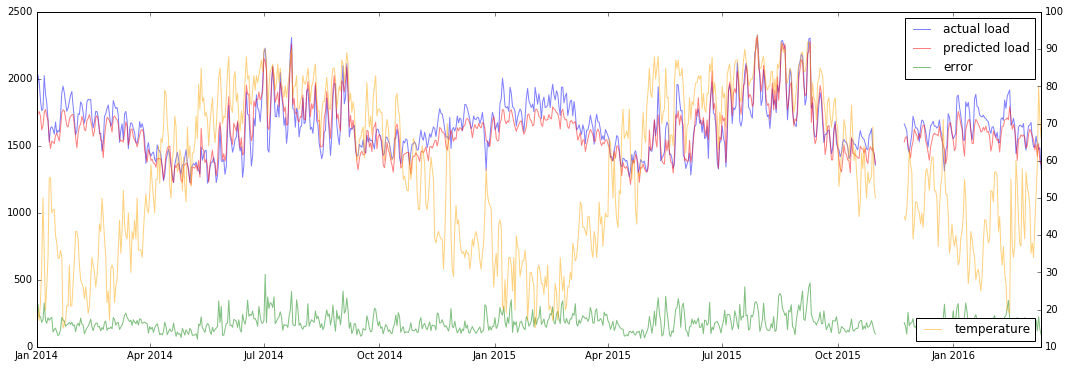

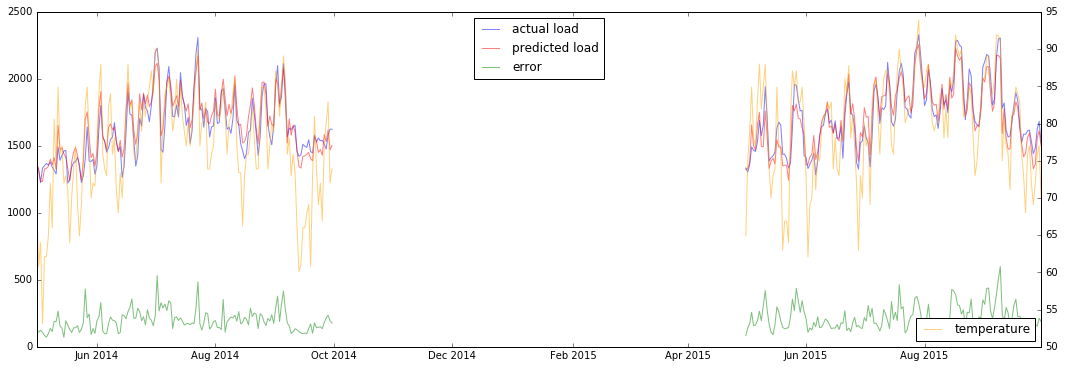

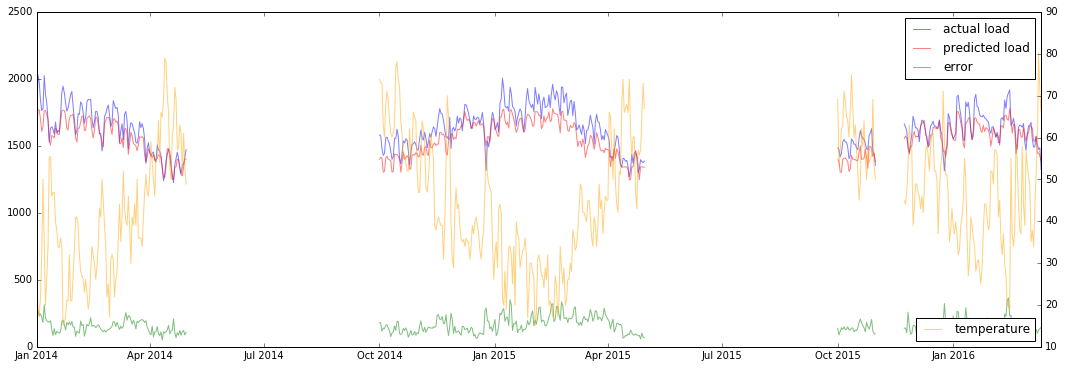

In [729]:
plot_model_performance(X_test, y_test, gbr, full)
plot_model_performance(X_test2, y_test2, gbr2, summers)
plot_model_performance(X_test3, y_test3, gbr3, winters)


In [ ]:
from sklearn import tree
import pydotplus as pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

t = gbr.estimators_[0][0].tree_dot_data = StringIO()  

tree.export_graphviz(t, out_file=dot_data,  
                         feature_names=features,  
#                          class_names=gbr2.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [568]:
joblib.dump(gbr2, '../models/summer_gbr_model.pkl')
joblib.dump(gbr3, '../models/winter_gbr_model.pkl')

['../models/winter_gbr_model.pkl',
 '../models/winter_gbr_model.pkl_01.npy',
 '../models/winter_gbr_model.pkl_02.npy',
 '../models/winter_gbr_model.pkl_03.npy',
 '../models/winter_gbr_model.pkl_04.npy',
 '../models/winter_gbr_model.pkl_05.npy',
 '../models/winter_gbr_model.pkl_06.npy',
 '../models/winter_gbr_model.pkl_07.npy',
 '../models/winter_gbr_model.pkl_08.npy',
 '../models/winter_gbr_model.pkl_09.npy',
 '../models/winter_gbr_model.pkl_10.npy',
 '../models/winter_gbr_model.pkl_11.npy',
 '../models/winter_gbr_model.pkl_12.npy',
 '../models/winter_gbr_model.pkl_13.npy',
 '../models/winter_gbr_model.pkl_14.npy',
 '../models/winter_gbr_model.pkl_15.npy',
 '../models/winter_gbr_model.pkl_16.npy',
 '../models/winter_gbr_model.pkl_17.npy',
 '../models/winter_gbr_model.pkl_18.npy',
 '../models/winter_gbr_model.pkl_19.npy',
 '../models/winter_gbr_model.pkl_20.npy',
 '../models/winter_gbr_model.pkl_21.npy',
 '../models/winter_gbr_model.pkl_22.npy',
 '../models/winter_gbr_model.pkl_23.npy',

In [654]:
X_test.iloc[100]

year            2014
doy                1
dow                2
minute           500
temperaturef      14
Name: 1465365, dtype: float64

In [652]:
z = np.matrix([X_test.iloc[100].year, X_test.iloc[100].doy, X_test.iloc[100].dow, X_test.iloc[100].minute, X_test.iloc[100].temperaturef])

In [653]:
mon = 7
if mon >4 and mon < 10:
    score = gbr2.predict(z)[0]
else:
    score = gbr3.predict(z)[0]

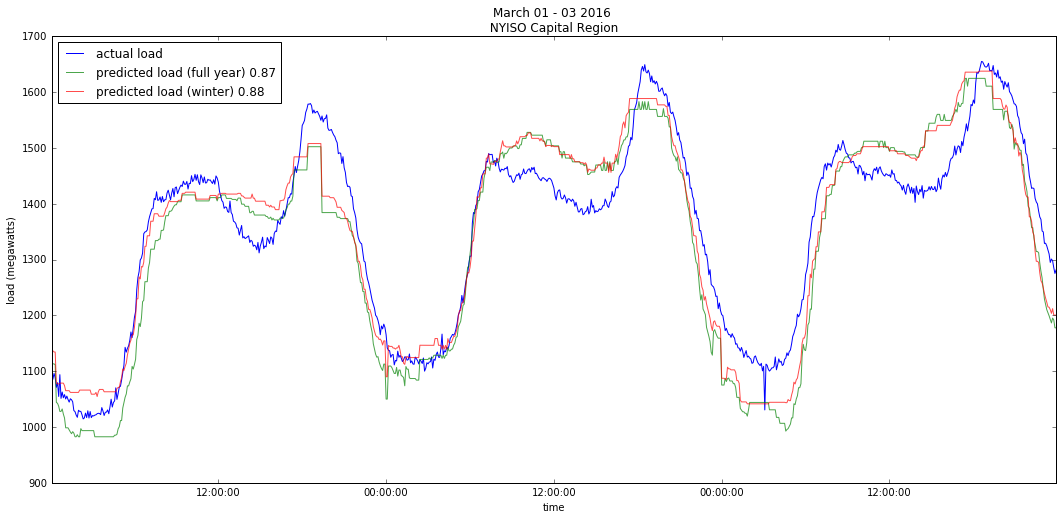

In [761]:
test_day = full[full.timestamp > pd.to_datetime('2016-02-29')]
test_day = test_day[test_day.timestamp < pd.to_datetime('2016-03-03')]

predictions = gbr.predict(test_day[features])
predictions2 = gbr3.predict(test_day[features])

plt.figure(figsize = (18,8))
plt.plot(test_day.timestamp.values, test_day.load.values, label = 'actual load')
plt.plot(test_day.timestamp.values, predictions, label = 'predicted load (full year) %.2f'%gbr_score, alpha=.7)
plt.plot(test_day.timestamp.values, predictions2, label = 'predicted load (winter) %.2f'%gbr_score3, alpha=.7)
plt.legend(loc='best')
plt.title('March 01 - 03 2016 \n NYISO Capital Region ')
plt.xlabel('time')
plt.ylabel('load (megawatts)')

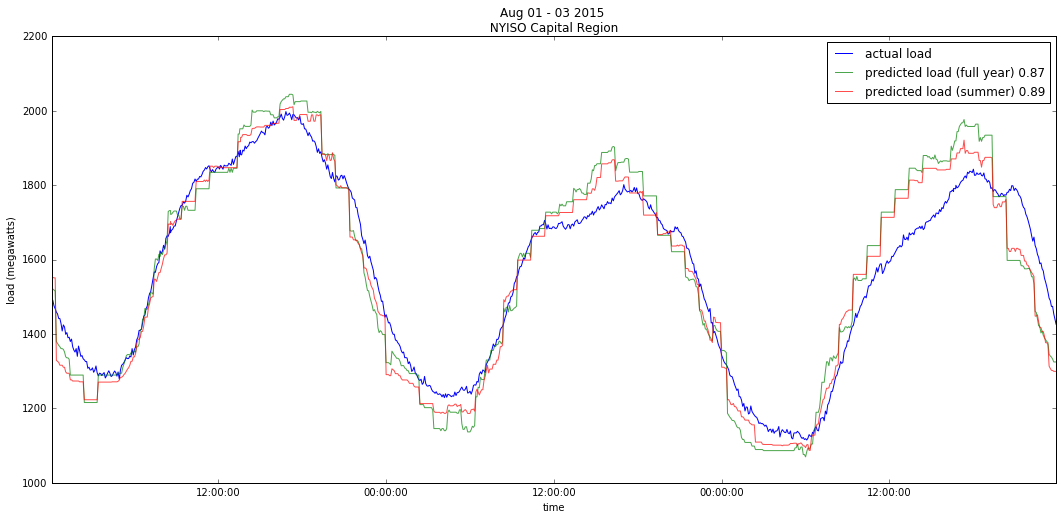

In [764]:
test_day2 = full[full.timestamp > pd.to_datetime('2015-07-31')]
test_day2 = test_day2[test_day2.timestamp < pd.to_datetime('2015-08-03')]

s_predictions = gbr.predict(test_day2[features])
s_predictions2 = gbr2.predict(test_day2[features])

plt.figure(figsize = (18,8))
plt.plot(test_day2.timestamp.values, test_day2.load.values, label = 'actual load')
plt.plot(test_day2.timestamp.values, s_predictions, label = 'predicted load (full year) %.2f'%gbr_score, alpha=.7)
plt.plot(test_day2.timestamp.values, s_predictions2, label = 'predicted load (summer) %.2f'%gbr_score2, alpha=.7)
plt.legend(loc='best')
plt.title('Aug 01 - 03 2015 \n NYISO Capital Region ')
plt.xlabel('time')
plt.ylabel('load (megawatts)')

In [781]:
cols = [i for i in features]

In [784]:
cols.append('load')

In [787]:
cols.append('temperaturef')

In [790]:
full.to_csv('capital2001.csv')

In [768]:
from statsmodels.tsa.arima_model import ARIMA